In [1]:
import tensorflow as tf
tf.__version__

2023-08-05 13:48:42.336928: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 13:48:42.906015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.13.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(units=10, activation="softmax")
])

2023-08-05 13:49:08.589258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 13:49:08.655146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 13:49:08.655660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 13:49:08.660921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-05 13:49:08.661296: I tensorflow/compile

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [5]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
sparse_categorical_crosssentropy_loss = tf.keras.losses.SparseCategoricalCrossentropy()
sparse_categorical_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()
mean_absolute_error_metric = tf.keras.metrics.MeanAbsoluteError()

In [6]:
model.compile(
    optimizer=adam_optimizer,
    loss=sparse_categorical_crosssentropy_loss,
    metrics=[sparse_categorical_accuracy_metric, mean_absolute_error_metric]
)

In [7]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [8]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [9]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

In [10]:
model.fit(train_images[..., np.newaxis], train_labels, batch_size=256, epochs=8, verbose=2)

Epoch 1/8


2023-08-05 13:51:23.656292: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-05 13:51:34.148917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-05 13:51:34.373674: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1dfb3ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-05 13:51:34.373755: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2023-08-05 13:51:34.580489: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-05 13:51:35.659821: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

235/235 - 28s - loss: 1.1125 - sparse_categorical_accuracy: 0.6958 - mean_absolute_error: 4.4200 - 28s/epoch - 118ms/step
Epoch 2/8
235/235 - 1s - loss: 0.5680 - sparse_categorical_accuracy: 0.7993 - mean_absolute_error: 4.4200 - 1s/epoch - 4ms/step
Epoch 3/8
235/235 - 1s - loss: 0.4865 - sparse_categorical_accuracy: 0.8300 - mean_absolute_error: 4.4200 - 996ms/epoch - 4ms/step
Epoch 4/8
235/235 - 2s - loss: 0.4444 - sparse_categorical_accuracy: 0.8458 - mean_absolute_error: 4.4200 - 2s/epoch - 10ms/step
Epoch 5/8
235/235 - 3s - loss: 0.4182 - sparse_categorical_accuracy: 0.8549 - mean_absolute_error: 4.4200 - 3s/epoch - 11ms/step
Epoch 6/8
235/235 - 3s - loss: 0.3998 - sparse_categorical_accuracy: 0.8612 - mean_absolute_error: 4.4200 - 3s/epoch - 11ms/step
Epoch 7/8
235/235 - 3s - loss: 0.3855 - sparse_categorical_accuracy: 0.8658 - mean_absolute_error: 4.4200 - 3s/epoch - 11ms/step
Epoch 8/8
235/235 - 3s - loss: 0.3745 - sparse_categorical_accuracy: 0.8697 - mean_absolute_error: 4.42

## The evaluate and predict methods

#### Evaluate the model on the test set

In [11]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 5s - loss: 0.3917 - sparse_categorical_accuracy: 0.8597 - mean_absolute_error: 4.4200 - 5s/epoch - 17ms/step


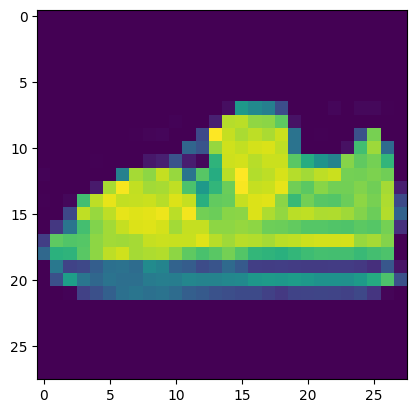

Label: Sneaker


In [12]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [13]:
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 424ms/step
Model prediction: Sneaker
